# Impute missing values with "ExtraTreesRegressor"

In [30]:
# Import pandas
import pandas as pd
import pytoolbox as ptb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Upload 'bike_rentals.csv' to dataFrame
df_bikes = pd.read_csv('bike_rentals.csv')

In [3]:
# Drop 'casual', 'registered' columns
df_bikes = df_bikes.drop(['dteday', 'casual', 'registered'], axis=1)

In [4]:
# Split data into X and y
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

In [5]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Impute missing values 

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

# impute_estimator = KNeighborsRegressor(n_neighbors=5)
impute_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
# impute_estimator = RandomForestRegressor(n_estimators=10, random_state=0)

imp_mean = IterativeImputer(random_state=0, estimator=impute_estimator)

# impute_estimator = KNNImputer(n_neighbors=5)
X_train_imputed = imp_mean.fit_transform(X_train)
X_test_imputed = imp_mean.transform(X_test)

# train/test approach
xg_reg = XGBRegressor()
xg_reg.fit(X_train_imputed, y_train)
y_pred = xg_reg.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {0:0.2f}\n'.format(rmse))

# k-fold cross validation
model = XGBRegressor(objective="reg:squarederror")
X_imputed = df_bikes.iloc[:,:-1]
X_imputed = imp_mean.fit_transform(X_imputed)
scores = cross_val_score(model, X_imputed, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))
print('RMSE std: {0:0.2f}'.format(rmse.std()))

RMSE: 697.41

Reg rmse: [ 725.19  659.63  533.93  702.44  862.74  997.13 1018.54  871.76  865.63
 1724.39]
RMSE mean: 896.14
RMSE std: 311.08


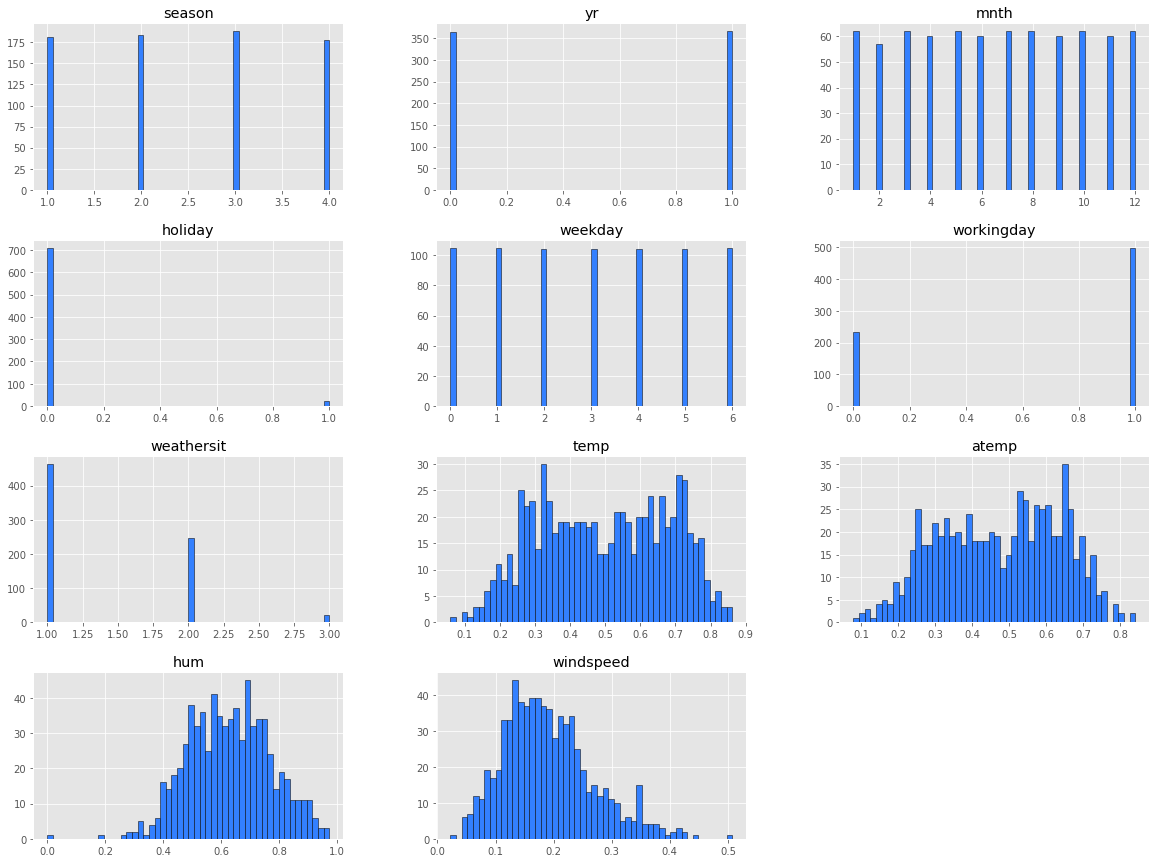

In [31]:
df_imputed = pd.read_csv('bike_rentals_cleaned.csv')
df_imputed = pd.DataFrame(X_imputed, columns=df_imputed.columns[:-1])

plt.style.use('ggplot')
df_imputed.loc[:, df_imputed.columns!='instant'].hist(bins=50, figsize=(20,15), ec='black', color='#3380FF')
plt.show()

## XGB book

In [20]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [21]:
# LinearRegression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

RMSE: 898.21


In [22]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

RMSE: 705.11


/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [23]:
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))

Reg rmse: [ 504.01  840.55 1140.88  728.39  640.2   969.95 1133.45 1252.85 1084.64
 1425.33]
RMSE mean: 972.02


In [24]:
model = XGBRegressor(objective="reg:squarederror")
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))
print('RMSE std: {0:0.2f}'.format(rmse.std()))

/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3

Reg rmse: [ 717.65  692.8   520.7   737.68  835.96 1006.24  991.34  747.61  891.99
 1731.13]
RMSE mean: 887.31
RMSE std: 313.46


# Machine Learning - Classification

In [32]:
# Upload Census dataset (adult) from UCI Machine Learning Repository
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# Display first 5 rows
df_census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [33]:
# Upload Census dataset with no header
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Display first 5 rows
df_census.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
# Define df_census columns
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']

# Display first 5 rows
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
# Display df_census info
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
# Drop education column
df_census = df_census.drop(['education'], axis=1)

In [ ]:
# Convert non-numeric columns using get_dummies
df_census = pd.get_dummies(df_census)

# Display first 5 rows
df_census.head()

In [ ]:
# Drop column 'income_ <=50K'
df_census = df_census.drop('income_ <=50K', axis=1)

In [ ]:
# Split data into X and y
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [ ]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define cross_val function with classifer and num_splits as input
def cross_val(classifier, num_splits=10):
    
    # Initialize classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.2f' % (scores.mean()))

In [ ]:
# Use cross_val function to score LogisticRegression
cross_val(LogisticRegression())

In [ ]:
# Import XGBoost Classifier
from xgboost import XGBClassifier

In [ ]:
# Use cross_val function to score XGBoost
cross_val(XGBClassifier(n_estimators=5))

In [1]:
from sklearn.impute import KNNImputer
import numpy as np

X = [ [3, np.NaN], [1, 2], [5, 10], [3, 6], [4, 8] ]
X_train = [[1, 2], [16, np.NaN], [25, 50], [50, 100], [3, 6] ]
print("X: ", X)
print("===========")


imputer = KNNImputer(n_neighbors= 1)
impute_with_1 = imputer.fit_transform(X)

print("\nImpute with 1 Neighbour: \n", impute_with_1)



imputer = KNNImputer(n_neighbors= 2)
impute_with_2 = imputer.fit_transform(X)

print("\n Impute with 2 Neighbours: \n", impute_with_1)

X:  [[3, nan], [1, 2], [5, 10], [3, 6], [4, 8]]

Impute with 1 Neighbour: 
 [[ 3.  6.]
 [ 1.  2.]
 [ 5. 10.]
 [ 3.  6.]
 [ 4.  8.]]

 Impute with 2 Neighbours: 
 [[ 3.  6.]
 [ 1.  2.]
 [ 5. 10.]
 [ 3.  6.]
 [ 4.  8.]]


In [2]:
imputer = KNNImputer(n_neighbors= 2)
imputer.fit(X)
impute_omd = imputer.transform(X_train)
print(X_train)
print(impute_omd)

[[1, 2], [16, nan], [25, 50], [50, 100], [3, 6]]
[[  1.   2.]
 [ 16.   9.]
 [ 25.  50.]
 [ 50. 100.]
 [  3.   6.]]


In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

impute_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
# impute_estimator = RandomForestRegressor(n_estimators=10, random_state=0)
imp_mean = IterativeImputer(random_state=0, estimator=impute_estimator)
imp_mean.fit(X)
impute_omd = imp_mean.transform(X_train)
print(impute_omd)

[[  1.   2.]
 [ 16.  10.]
 [ 25.  50.]
 [ 50. 100.]
 [  3.   6.]]


In [37]:
from sklearn.preprocessing import OneHotEncoder

### Correct
train = pd.DataFrame(['A', 'B', 'A', 'C'])
test = pd.DataFrame(['B', 'A', 'D'])

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train)

enc.transform(train).toarray()
#array([[1., 0., 0.],
#       [0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 1.]])

enc.transform(test).toarray()
#array([[0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 0.]])

### Incorrect
full = pd.concat((train, test))

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(full)

enc.transform(train).toarray()
#array([[1., 0., 0., 0.],
#       [0., 1., 0., 0.],
#       [1., 0., 0., 0.],
#       [0., 0., 1., 0.]])

enc.transform(test).toarray()
#array([[0., 1., 0., 0.],
#       [1., 0., 0., 0.],
#       [0., 0., 0., 1.]])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [38]:
train

,0
0,A
1,B
2,A
3,C


In [39]:
enc.transform(train).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [40]:
test

,0
0,B
1,A
2,D


In [41]:
enc.transform(test).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])